In [1]:
from time import time, localtime
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#2^17 = 131 072, а x mod 131 072 лежит в диапазоне 0..131 071

def fibb(N, first, second):
    """ Реализация ГПСЧ: f[i]=(f[i-a]+f[i-b]) mod M
    Возвращает набор псевдослучайных чисел
    N -- количество чисел в наборе
    тип N -- int
    first -- число, от которого начинается генерация
    тип first -- int
    second -- число, от которого начинается генерация
    тип second -- int """
    M = 2**17
    a = 13
    b = 34
    final = []
    final.append((first + second) % M)
    final.append((second + final[0]) % M)
    for i in range(2, a):
        final.append((final[i-1]+final[i-2]) % M)
    for i in range(a, b):
        final.append((final[i-a]+final[i-2]) % M)
    for i in range(b, N):
        final.append((final[i-a]+final[i-b]) % M)
    return final

In [3]:
def kongr(N, first, second):
    """ Реализация ГПСЧ: f[i]=(f[i-1] mod M1 + f[i-2] mod M2) mod M3
    Возвращает набор псевдослучайных чисел
    N -- количество чисел в наборе
    тип N -- int
    first -- число, от которого начинается генерация
    тип first -- int
    second -- число, от которого начинается генерация
    тип second -- int """
    M1 = 2**15
    M2 = 3**15
    M3 = 2**17
    final = []
    final.append((second % M1 + first % M2) % M3)
    final.append((final[0] % M1 + second % M2) % M3)
    for i in range(2, N):
        final.append((final[i-1] % M1 + final[i-2] % M2) % M3)
    return final

In [4]:
def middle(v):
    """ Возвращает выборочное среднее набора чисел
    v -- набор чисел 
    тип v -- list """
    return sum(v)/len(v)

def dis(v, mid):
    """ Возвращает стандартное отклонение набора чисел
    v -- набор чисел 
    тип v -- list 
    mid -- выборочное среднее набора
    тип mid -- float """
    summ = 0
    for i in range(len(v)):
        summ += (v[i] - mid)**2
    return (summ/(len(v)-1))**0.5

In [5]:
n = 10
N = 500
fibblist, kongrlist, fibbmiddle, kongrmiddle, fibbdis, kongrdis, fibbcov, kongrcov = [], [], [], [], [], [], [], []
for i in range(n):
    """ генерация 10 выборок ГПСЧ fibb объемом 500 элементов каждая, подсчет выборочного среднего, 
    стандартного отклонения и коэффициента вариации каждой из них """
    fibblist.append(fibb(N, int(time()//(i+3)-(-1)**(i+10)*i**i), localtime().tm_sec+i**(i+1)))
    fibbmiddle.append(round(middle(fibblist[i]), 2))
    fibbdis.append(round(dis(fibblist[i], fibbmiddle[i]), 2))
    fibbcov.append(round(100 * fibbdis[i]/fibbmiddle[i], 2))
for i in range(n):
    """ генерация 10 выборок ГПСЧ kongr объемом 500 элементов каждая, подсчет выборочного среднего, 
    стандартного отклонения и коэффициента вариации каждой из них """
    kongrlist.append(kongr(N, localtime().tm_sec+i**(i+1), int(time()//(i+2)-(-1)**(i+13)*i)))
    kongrmiddle.append(round(middle(kongrlist[i]), 2))
    kongrdis.append(round(dis(kongrlist[i], kongrmiddle[i]), 2))
    kongrcov.append(round(100 * kongrdis[i]/kongrmiddle[i], 2))

In [6]:
print("Так как элементы выборки принимают значения от 0 до 131 071, то ГСЧ должен выдавать такие выборки, для которых:\n    Выборочное среднее примерно равно 0.5 * 131072 =", round(0.5*131072), '\n    Стандартное отклонение примерно равно 0.2887 * 131072 =', round(0.2887 * 131072) )

print("\n    Информация о выборках, сгенерированных алгоритмом fibb:")
print("Выборочное среднее:", fibbmiddle)
print("Стандартное отклонение:", fibbdis)
print("Коэффициент вариации:", fibbcov)

print("\n    Информация о выборках, сгенерированных алгоритмом kongr:")
print("Выборочное среднее:", kongrmiddle)
print("Стандартное отклонение:", kongrdis)
print("Коэффициент вариации:", kongrcov)

Так как элементы выборки принимают значения от 0 до 131 071, то ГСЧ должен выдавать такие выборки, для которых:
    Выборочное среднее примерно равно 0.5 * 131072 = 65536 
    Стандартное отклонение примерно равно 0.2887 * 131072 = 37840

    Информация о выборках, сгенерированных алгоритмом fibb:
Выборочное среднее: [65259.04, 67011.31, 66304.82, 63555.91, 67935.71, 66832.2, 65739.85, 61312.25, 62445.22, 66901.58]
Стандартное отклонение: [38114.41, 37555.42, 38389.16, 38059.55, 37228.23, 38803.25, 38267.2, 37673.66, 38222.53, 39269.07]
Коэффициент вариации: [58.4, 56.04, 57.9, 59.88, 54.8, 58.06, 58.21, 61.45, 61.21, 58.7]

    Информация о выборках, сгенерированных алгоритмом kongr:
Выборочное среднее: [68031.64, 65754.21, 65656.01, 66195.92, 63622.48, 65923.73, 64341.34, 65551.87, 66717.16, 65311.18]
Стандартное отклонение: [37809.41, 36866.48, 37930.62, 38328.28, 37385.8, 37722.43, 37533.15, 38972.33, 38464.66, 37987.31]
Коэффициент вариации: [55.58, 56.07, 57.77, 57.9, 58.76, 57.2

In [19]:
print("   Теоретически:\nxi^2 =", round(stats.chi2.ppf(q=0.45, df=499), 4), "для m = 499, a = 0.45")
print("xi^2 =", round(stats.chi2.ppf(q=0.5, df=499), 4), "для m = 499, a = 0.5")
print("\nxi^2 =", round(stats.chi2.ppf(q=0.5, df=498), 4), "для m = 498, a = 0.5")
print("xi^2 =", round(stats.chi2.ppf(q=0.55, df=498), 4), "для m = 498, a = 0.55")
print("\nxi^2 =", round(stats.chi2.ppf(q=0.5, df=497), 4), "для m = 497, a = 0.5")
print("xi^2 =", round(stats.chi2.ppf(q=0.55, df=497), 4), "для m = 497, a = 0.55")
print("\nxi^2 =", round(stats.chi2.ppf(q=0.5, df=496), 4), "для m = 496, a = 0.5")
print("xi^2 =", round(stats.chi2.ppf(q=0.55, df=496), 4), "для m = 496, a = 0.55")
print("\nxi^2 =", round(stats.chi2.ppf(q=0.55, df=494), 4), "для m = 494, a = 0.55")
print("xi^2 =", round(stats.chi2.ppf(q=0.6, df=494), 4), "для m = 494, a = 0.6")
print("\nxi^2 =", round(stats.chi2.ppf(q=0.55, df=493), 4), "для m = 493, a = 0.55")
print("xi^2 =", round(stats.chi2.ppf(q=0.6, df=493), 4), "для m = 493, a = 0.6")
print("\nxi^2 =", round(stats.chi2.ppf(q=0.6, df=490), 4), "для m = 490, a = 0.6")
print("xi^2 =", round(stats.chi2.ppf(q=0.65, df=490), 4), "для m = 490, a = 0.65")
print("\nxi^2 =", round(stats.chi2.ppf(q=0.6, df=488), 4), "для m = 488, a = 0.6")
print("xi^2 =", round(stats.chi2.ppf(q=0.65, df=488), 4), "для m = 488, a = 0.65")

   Теоретически:
xi^2 = 494.3773 для m = 499, a = 0.45
xi^2 = 498.3335 для m = 499, a = 0.5

xi^2 = 497.3335 для m = 498, a = 0.5
xi^2 = 501.3067 для m = 498, a = 0.55

xi^2 = 496.3335 для m = 497, a = 0.5
xi^2 = 500.3027 для m = 497, a = 0.55

xi^2 = 495.3335 для m = 496, a = 0.5
xi^2 = 499.2988 для m = 496, a = 0.55

xi^2 = 497.2908 для m = 494, a = 0.55
xi^2 = 501.3334 для m = 494, a = 0.6

xi^2 = 496.2868 для m = 493, a = 0.55
xi^2 = 500.3253 для m = 493, a = 0.6

xi^2 = 497.3011 для m = 490, a = 0.6
xi^2 = 501.4855 для m = 490, a = 0.65

xi^2 = 495.2848 для m = 488, a = 0.6
xi^2 = 499.4609 для m = 488, a = 0.65


In [8]:
""" Проверка равномерности распределение и случайности критерием хи-квадрат """
print("\n    Для выборок, сгенерированных алгоритмом fibb:")
for i in range(n):
    xi = 0
    sample = fibblist[i]
    unique = list(set(sample))
    prob = 1/len(unique)
    for j in range(len(unique)):
        xi += (sample.count(unique[j])/len(sample) - len(sample)*prob)**2/(len(sample)*prob)
    print("xi^2 =", round(xi, 4), "при m =", len(unique) - 1)

print("\n    Для выборок, сгенерированных алгоритмом kongr:")
for i in range(n):
    xi = 0
    sample = kongrlist[i]
    unique = list(set(sample))
    prob = 1/len(unique)
    for j in range(len(unique)):
        xi += (sample.count(unique[j])/len(sample)
               - len(sample)*prob)**2/(len(sample)*prob)
    print("xi^2 =", round(xi, 4), "при m =", len(unique) - 1)
    
#значит, гипотеза о случайности выполняется с вероятностью, близкой к 0.5


    Для выборок, сгенерированных алгоритмом fibb:
xi^2 = 498.002 при m = 498
xi^2 = 498.002 при m = 499
xi^2 = 498.002 при m = 497
xi^2 = 498.002 при m = 497
xi^2 = 498.002 при m = 498
xi^2 = 498.002 при m = 499
xi^2 = 498.002 при m = 496
xi^2 = 498.002 при m = 497
xi^2 = 498.002 при m = 499
xi^2 = 498.002 при m = 498

    Для выборок, сгенерированных алгоритмом kongr:
xi^2 = 498.002 при m = 497
xi^2 = 498.002 при m = 497
xi^2 = 498.002 при m = 497
xi^2 = 498.002 при m = 494
xi^2 = 498.002 при m = 493
xi^2 = 498.002 при m = 499
xi^2 = 498.002 при m = 499
xi^2 = 498.002 при m = 493
xi^2 = 498.002 при m = 490
xi^2 = 498.002 при m = 488


[]

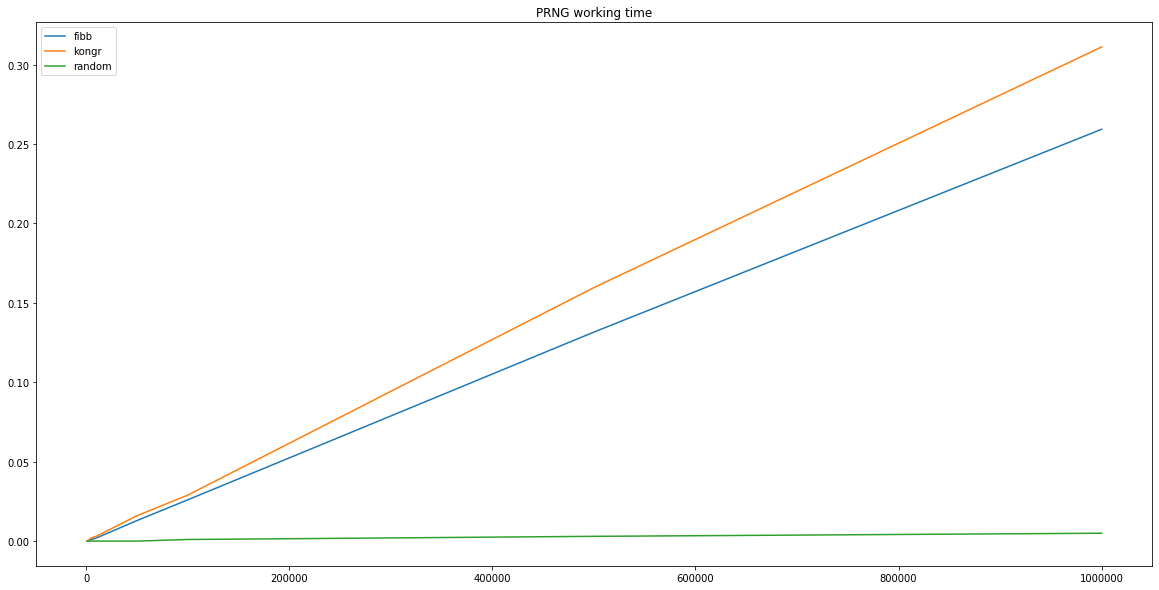

In [9]:
sizes = [1000, 5000, 10000, 50000, 100000, 500000, 1000000]
fibb_time, kongr_time, rand_time = [], [], []

""" Засекаем время генерации чисел, используя fibb, kongr и встроенный random """
for i in sizes:
    tic = time()
    fibb(i, 13271, 397)
    toc = time()
    fibb_time.append(toc-tic)
    
    tic = time()
    kongr(i, 13271, 397)
    toc = time()
    kongr_time.append(toc-tic)
    
    tic = time()
    np.random.randint(0, 131071, i)
    toc = time()
    rand_time.append(toc-tic)
    
""" Построение графиков зависимости времени генерации чисел от объема получаемых наборов """
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(sizes, fibb_time, label = 'fibb')
ax.plot(sizes, kongr_time, label = 'kongr')
ax.plot(sizes, rand_time, label = 'random')
ax.legend()
ax.set_title('PRNG working time')
ax.plot()